# **Análisis Inicial de Variables Numéricas 📈**

En este notebook analizamos las tres variables continuas clave del dataset: `age` (Edad), `avg_glucose_level` (Nivel de Glucosa) y `bmi` (Índice de Masa Corporal).

**Objetivos:**
1. **Visualización de estadísticos** Usaremos el metodo .describe para observar los estadisticos de nuestras variables numericas.
2. **Distribución, Normalidad y Forma:** Identificar sesgos mediante Histogramas, KDE, Skewness (Asimetría) y Curtosis.Posteriormente aplicar el test Shapiro-Wilk para saber si esa distribución es o no normal.
3. **Detección de Valores Atípicos:** Utilizar Boxplots y el método del Rango Intercuartílico (IQR) para cuantificar los Outliers.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro

# Cargar dataset
df = pd.read_csv('dataset/healthcare-dataset-stroke-transformed.csv')

# Definir variables numéricas
num_cols = ['age', 'avg_glucose_level', 'bmi']

df[num_cols].describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.229986,106.140399,28.863300
std,22.613575,45.285004,7.699785
min,0.080000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


Tras ver esos estadísticos vamos a visualizar las distribuciones de nuestros datos

c:\Users\delhy.py\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5109.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\delhy.py\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5109.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\delhy.py\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5109.
  res = hypotest_fun_out(*samples, **kwds)


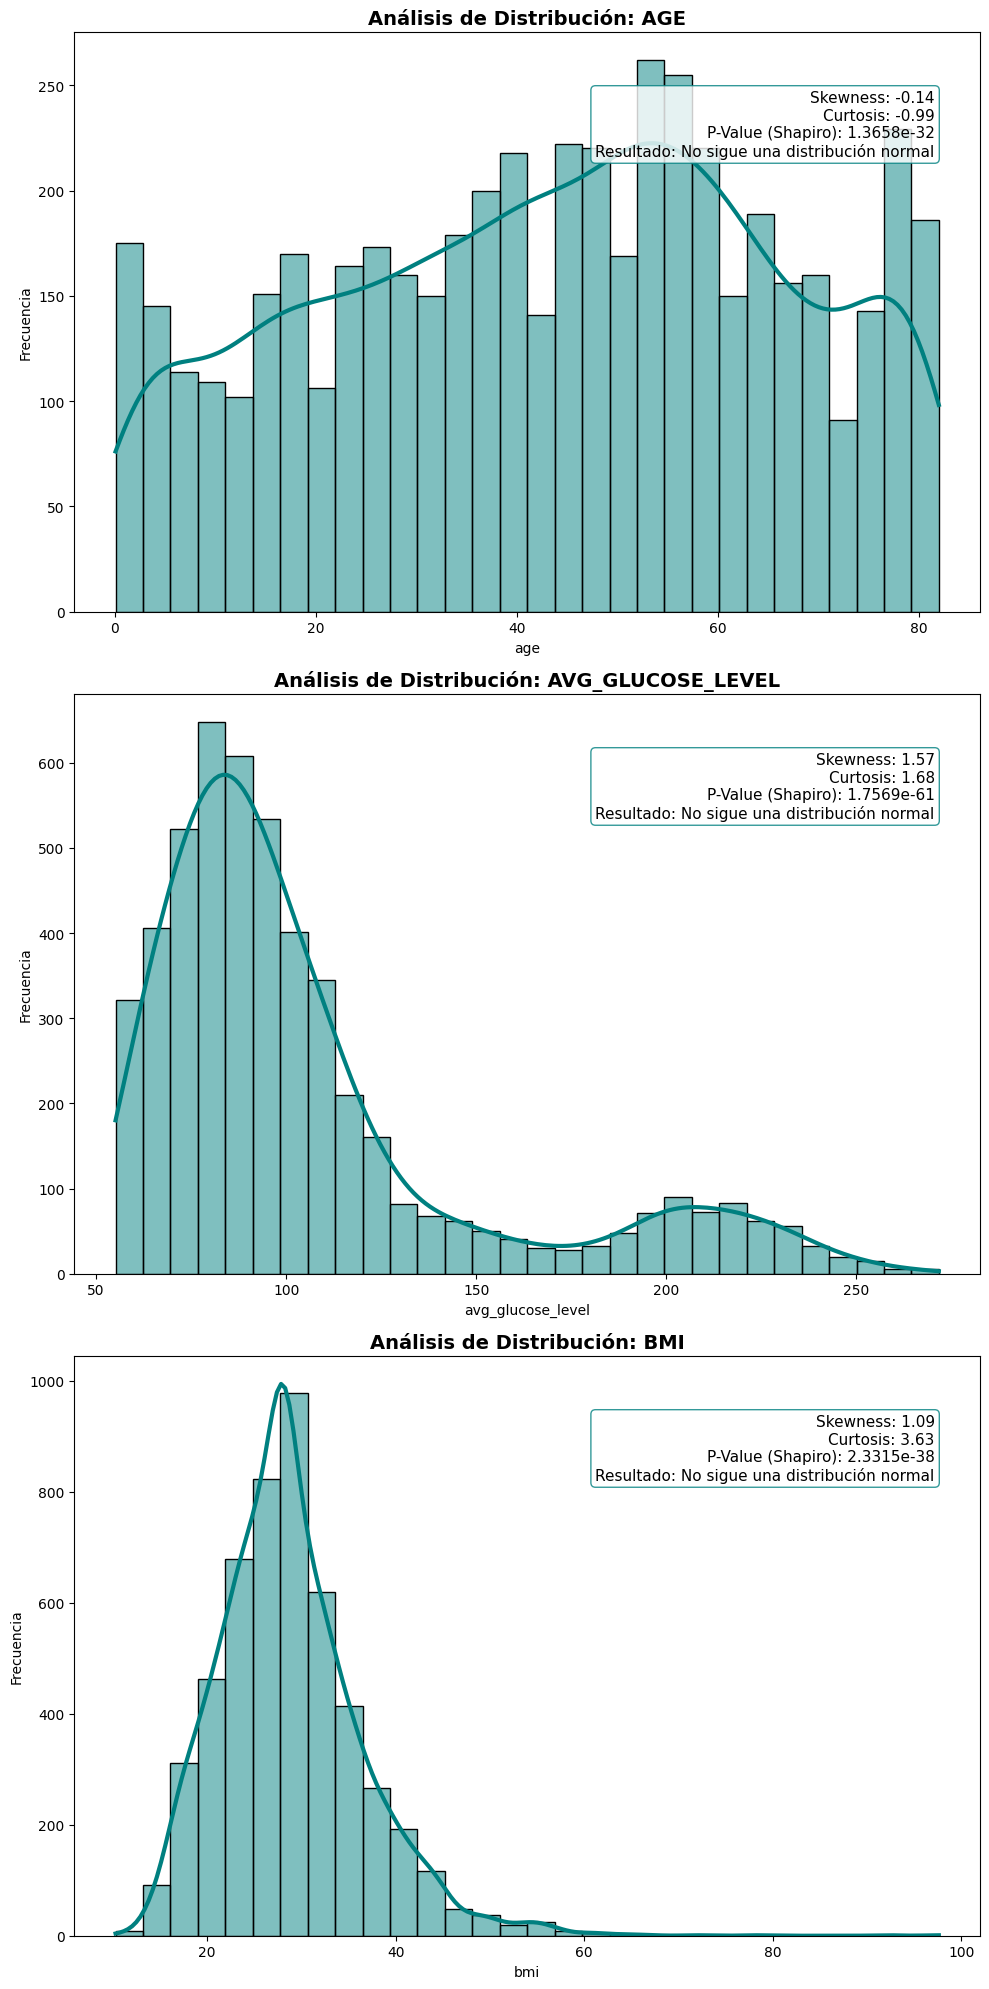

In [2]:
# Configuración de los gráficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i, col in enumerate(num_cols):
    # 1. Limpiar datos (Shapiro-Wilk no acepta nulos y prefiere muestras < 5000, 
    # pero para el análisis descriptivo usaremos la columna limpia)
    data_clean = df[col].dropna()
    
    # 2. Calcular métricas básicas
    s = skew(data_clean)
    k = kurtosis(data_clean)
    
    # 3. Prueba de Normalidad de Shapiro-Wilk
    # Nota: Si la muestra es muy grande, Shapiro puede ser muy sensible. 
    # Se reporta el p-value para rigor estadístico.
    stat, p_value = shapiro(data_clean)
    es_normal = "Sigue una distribución normal" if p_value > 0.05 else "No sigue una distribución normal"
    
    # 4. Graficar Histograma + KDE
    sns.histplot(data_clean, kde=True, ax=axes[i], color='teal', bins=30, line_kws={'linewidth': 3})
    
    # 5. Estética y Títulos
    axes[i].set_title(f'Análisis de Distribución: {col.upper()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    
    # 6. Cuadro de texto con todas las métricas
    info_text = (f'Skewness: {s:.2f}\n'
                 f'Curtosis: {k:.2f}\n'
                 f'P-Value (Shapiro): {p_value:.4e}\n'
                 f'Resultado: {es_normal}')
    
    # Posicionar el texto de forma estética
    axes[i].text(0.95, 0.90, info_text, transform=axes[i].transAxes, 
                 fontsize=11, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='teal'))

plt.tight_layout()
plt.show()

Vamos a visualizar y contar si existen outlayers en estas variables (pareciera indicar todo que sí gracias a observar los gráficos)

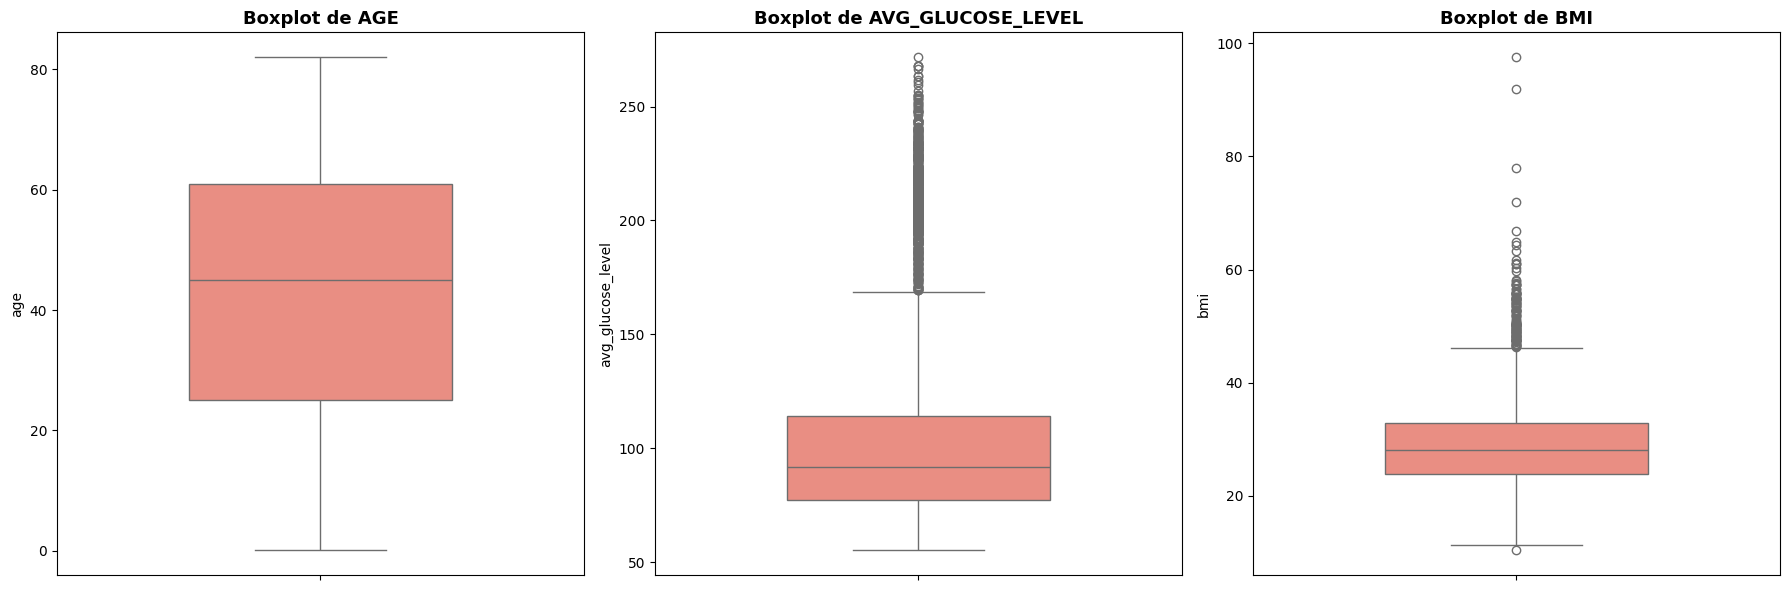


--- RESUMEN DE VALORES ATÍPICOS (OUTLIERS) ---


,Variable,Q1,Q3,IQR,Límite Inf,Límite Sup,Cant. Outliers,% Outliers
0,age,25.00,61.00,36.00,-29.00,115.00,0,0.00%
1,avg_glucose_level,77.24,114.09,36.85,21.96,169.36,627,12.27%
2,bmi,23.80,32.80,9.00,10.30,46.30,126,2.47%


In [2]:
# Preparar tabla para resultados de outliers
outlier_results = []

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(num_cols):
    # 1. Crear Boxplot
    sns.boxplot(y=df[col], ax=axes[i], color='salmon', width=0.5)
    axes[i].set_title(f'Boxplot de {col.upper()}', fontsize=13, fontweight='bold')
    
    # 2. Cálculo de Outliers mediante IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar filas
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    total_outliers = outliers.shape[0]
    
    outlier_results.append({
        'Variable': col,
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Límite Inf': round(limite_inferior, 2),
        'Límite Sup': round(limite_superior, 2),
        'Cant. Outliers': total_outliers,
        '% Outliers': f"{(total_outliers/len(df)*100):.2f}%"
    })

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
df_outliers = pd.DataFrame(outlier_results)
print("\n--- RESUMEN DE VALORES ATÍPICOS (OUTLIERS) ---")
display(df_outliers)

## **Conclusiones del Análisis de Variables Numéricas 📋**

Tras completar el análisis descriptivo y de distribución de las variables continuas (`age`, `avg_glucose_level`, `bmi`), se presentan los siguientes hallazgos críticos para la fase de modelado:

### **Análisis de Distribución y Forma**
* **Edad (`age`):** Presenta una distribución relativamente uniforme con una ligera asimetría negativa (-0.14). Esto indica una muestra equilibrada que cubre todo el espectro de vida, aunque con una mayor concentración hacia edades avanzadas, que es donde se espera la mayor incidencia de infartos.
* **Glucosa (`avg_glucose_level`):** Es la variable con mayor **Asimetría Positiva (1.57)** y una **Curtosis de 1.68**. La curva KDE muestra una distribución bimodal: una gran concentración en niveles normales y un segundo "pico" o cola larga hacia niveles de hiperglucemia (>150 mg/dL).
* **IMC (`bmi`):** Muestra una asimetría positiva moderada (1.05). La mayoría de los pacientes se encuentran en rangos de sobrepeso, pero la distribución es más "puntiaguda" (curtosis más alta) que la edad.

Y gracias a aplicar el **Test Shapiro-Wilk** validamos el hecho de que ninguna de nuestras variables seguía una distribusión normal.

### **Hallazgos sobre Valores Atípicos (Outliers)**
* **Glucosa (627 outliers - 12.27%):** El alto porcentaje de valores atípicos en glucosa no representa errores de medición, sino una condición clínica real: **pacientes diabéticos o pre-diabéticos**. Eliminar estos datos privaría al modelo de información vital sobre el riesgo de infarto.
* **IMC (110 outliers - 2.15%):** Los valores superiores al límite de ~47.5 kg/m² son considerados atípicos por el método IQR. No obstante, al representar obesidad grado III (mórbida), son registros clínicamente posibles y de alto interés predictivo.
* **Edad (0 outliers):** No existen valores atípicos en la edad, lo que confirma la calidad de la recolección de datos demográficos en este dataset.

---